In [492]:
import matplotlib.pyplot as plt
import importlib
import bitmap_editor
importlib.reload(bitmap_editor)
import numpy as np

height = 10
width = 10
bitmap_matrix = np.zeros(shape=(height,width))
bitmapEditor = bitmap_editor.BitmapEditor(bitmap_matrix)

Canvas(height=1000, width=1000)

In [363]:
# A = [[1,1], [2,2]]
# print(A[(1,1)]a)

[[None None None]
 [None None None]
 [None None None]]


[1 1]
[0 1]
[-1  1]
[ 1 -1]
[-1  0]
[ 1 -1]
[-1 -1]
Non bnd count: 9792
NON bndr len pA: 9792
(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(0, 10)
(0, 11)
(0, 12)
(0, 13)
(0, 14)
(0, 15)
(0, 16)
(0, 17)
(0, 18)
(0, 19)
(0, 20)
(0, 21)
(0, 22)
(0, 23)
(0, 24)
(0, 25)
(0, 26)
(0, 27)
(0, 28)
(0, 29)
(0, 30)
(0, 31)
(0, 32)
(0, 33)
(0, 34)
(0, 35)
(0, 36)
(0, 37)
(0, 38)
(0, 39)
(0, 40)
(0, 41)
(0, 42)
(0, 43)
(0, 44)
(0, 45)
(0, 46)
(0, 47)
(0, 48)
(0, 49)
(0, 50)
(0, 51)
(0, 52)
(0, 53)
(0, 54)
(0, 55)
(0, 56)
(0, 57)
(0, 58)
(0, 59)
(0, 60)
(0, 61)
(0, 62)
(0, 63)
(0, 64)
(0, 65)
(0, 66)
(0, 67)
(0, 68)
(0, 69)
(0, 70)
(0, 71)
(0, 72)
(0, 73)
(0, 74)
(0, 75)
(0, 76)
(0, 77)
(0, 78)
(0, 79)
(0, 80)
(0, 81)
(0, 82)
(0, 83)
(0, 84)
(0, 85)
(0, 86)
(0, 87)
(0, 88)
(0, 89)
(0, 90)
(0, 91)
(0, 92)
(0, 93)
(0, 94)
(0, 95)
(0, 96)
(0, 97)
(0, 98)
(0, 99)
(57, 34)
(57, 35)
(57, 36)
(57, 34)
(57, 36)
(58, 34)
(58, 36)
(58, 34)
(59, 35)
(59, 36)
(59, 35)
(59, 36)
(99, 0)


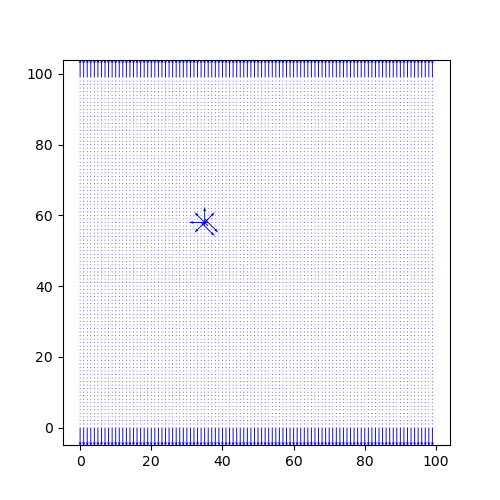

In [493]:
import navier_stokes
importlib.reload(navier_stokes)

grid = np.flip(np.copy(bitmap_matrix), 0)

######### Actual simulation code

fluid_cells = navier_stokes.fluid_cells2(grid)
fluid_cell_index = navier_stokes.fluid_cell_index(fluid_cells, grid.shape)

# navier_stokes.simplify_normals(fluid_cells)

A, b = navier_stokes.projection_A(fluid_cells, fluid_cell_index, grid.shape[1])
# b = navier_stokes.projection_b(fluid_cells)

print(len(b))

################
X, Y = np.meshgrid(np.arange(width), np.arange(height))
NormalsU = np.zeros(shape=(height, width))
NormalsV = np.zeros(shape=(height, width))

for fluid_cell in fluid_cells:
    normal = np.array([0, 0])
    if fluid_cell.boundary_normal is not None:
        normal = fluid_cell.boundary_normal
    NormalsU[fluid_cell.grid_index] = normal[0]
    NormalsV[fluid_cell.grid_index] = normal[1]


%matplotlib widget
fig, ax = plt.subplots(figsize=(5, 5))
ax.quiver(X, Y, NormalsU, NormalsV, color="b", scale=20)
plt.show()

In [426]:

with np.printoptions(threshold=np.inf):
    print(A)

print(b)
print(len(b))
print(A.shape)

[[-3.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   1.   1.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. 

1001
2.3870239056345373
[1.27241584e+14 1.27241584e+14 1.27241584e+14 ... 1.27241584e+14
 1.27241584e+14 1.27241584e+14]
127241584065072.0


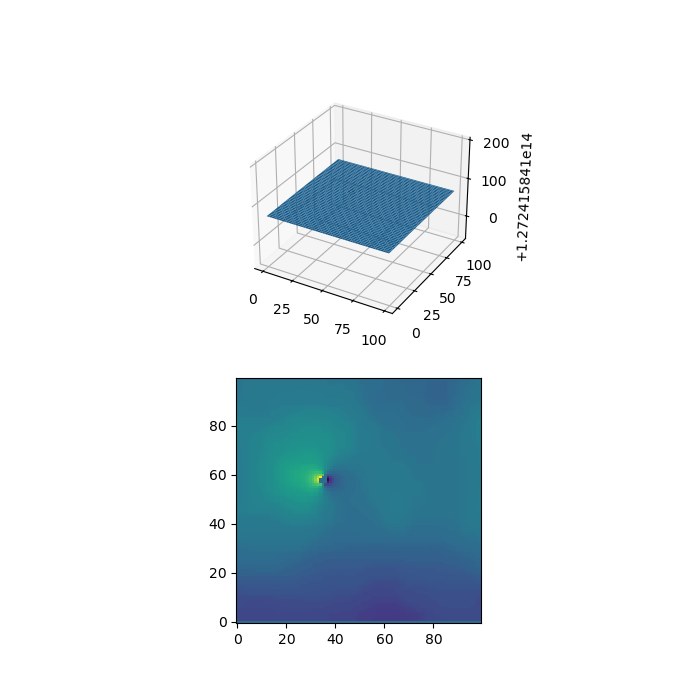

In [494]:
%matplotlib widget
import pyamg

ml = pyamg.ruge_stuben_solver(A)  # Build the multigrid hierarchy
residuals = []
x = ml.solve(b, tol=1e-8, maxiter=1000, residuals=residuals)
print(len(residuals))
print(residuals[-1])
# x = np.linalg.solve(A,b)

print(x)

mesh = np.zeros(shape=(height,width))

avg = np.average(x)
print(avg)

for j in range(0,height):
    for i in range(0,width):
        fluid_cell = fluid_cell_index[j][i]
        if fluid_cell is None:
            mesh[j][i] = avg
            continue
        if fluid_cell.boundary_normal is not None:
            # TODO: Calculate the ghost cell value.
            mesh[j][i] = avg
            continue

        # if grid[j][i]:
        # index = fluid_cell_index[j][i]
        mesh[j][i] = x[fluid_cell.non_boundary_index]


fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(211, projection='3d')
ax2 = fig.add_subplot(212)
ax2.imshow(mesh, interpolation='none', origin='lower')

# plt.imshow(mesh, interpolation='none', origin='lower')
ax.plot_surface(X,Y,mesh) 
plt.show()

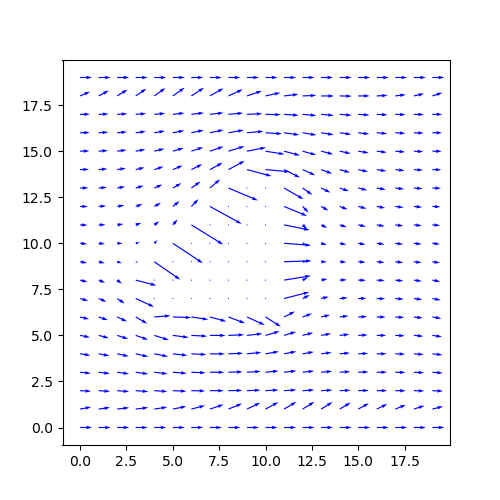

In [467]:
U = np.zeros(shape=mesh.shape)
V = np.zeros(shape=mesh.shape)

for fluid_cell in fluid_cells:
    if fluid_cell.boundary_normal is not None:
        continue

    j,i = fluid_cell.grid_index
    # xa = fluid_cells[fluid_cell.x_diff[0]].grid_index
    # xb = fluid_cells[fluid_cell.x_diff[1]].grid_index
    # xd = fluid_cell.x_diff[2]

    U[j][i] = (mesh[j][(i+1)%width] - mesh[j][(i-1)%width])/2
    V[j][i] = (mesh[j+1][i] - mesh[j-1][i])/2

newU = 1-U

for j,i in np.ndindex(mesh.shape):
    if grid[j][i]:
        newU[j][i]=0

fig, ax = plt.subplots(figsize=(5, 5))
ax.quiver(X, Y, newU, -V, color="b")
# ax.quiver(X, Y, -U, -V, color="b")
# ax.quiver(X, Y, U,V, color="r")
plt.show()

# ax3.quiver(X,Y, 2-U, -V)

In [ ]:
A = np.array([[0,0,1], [0,0,0], [0,0,0]])

print(np.array((1,1)))
# print(len(A))
# obstacle_indices = (np.array(np.where(A == 1)).T - np.array([1,1])).tolist()

obstacle_indices = [(j-1,i-1) for j in range(3) for i in range(3) if A[j][i]]

# print(obstacle_indices)
# print(obstacle_indices)
# print([-1, 1] in obstacle_indices)

# print(np.array([1,1]) == np.abs(np.array([-1,1])))

# corner = np.abs(obstacle_indices[0]) == np.array([1,1])
# print(corner)
# print(np.abs(obstacle_indices[0]) == 
# if ():
#     print('corner')
# np.any([A[i]>8 for i in [(1,1),(2,2),(0,0)]])

In [264]:
np.sign(0)

0